In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
transactions = pd.read_csv('Transactions.csv')


# Display basic information about the dataset

In [3]:
print(transactions.info())

# Display the first few rows of the dataset
print(transactions.head())

# Check for missing values
print(transactions.isnull().sum())

# Summary statistics
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10 

# Total revenue calculation

In [16]:
total_revenue = transactions['TotalValue'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $689995.56


# Display the first few rows of the dataset

In [21]:
print(transactions.head())

                    TransactionID CustomerID ProductID  Quantity  TotalValue  \
TransactionDate                                                                
2024-08-25 12:38:23        T00001      C0199      P067         1      300.68   
2024-05-27 22:23:54        T00112      C0146      P067         1      300.68   
2024-04-25 07:38:55        T00166      C0127      P067         1      300.68   
2024-03-26 22:55:37        T00272      C0087      P067         2      601.36   
2024-03-21 15:10:10        T00363      C0070      P067         3      902.04   

                      Price  
TransactionDate              
2024-08-25 12:38:23  300.68  
2024-05-27 22:23:54  300.68  
2024-04-25 07:38:55  300.68  
2024-03-26 22:55:37  300.68  
2024-03-21 15:10:10  300.68  


# Strip whitespace from column names

In [22]:
transactions.columns = transactions.columns.str.strip()

# Load the dataset

In [23]:
transactions = pd.read_csv('Transactions.csv')

# Print the column names to check for 'TransactionDate'
print(transactions.columns)

# Display the first few rows of the dataset
print(transactions.head())

# Strip whitespace from column names
transactions.columns = transactions.columns.str.strip()

# Convert TransactionDate to datetime if the column exists
if 'TransactionDate' in transactions.columns:
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
else:
    print("Column 'TransactionDate' does not exist in the DataFrame.")

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


# Convert TransactionDate to datetime

In [24]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extracting additional features from TransactionDate
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month_name()
transactions['TransactionDay'] = transactions['TransactionDate'].dt.day_name()


# Analyzing total revenue by year

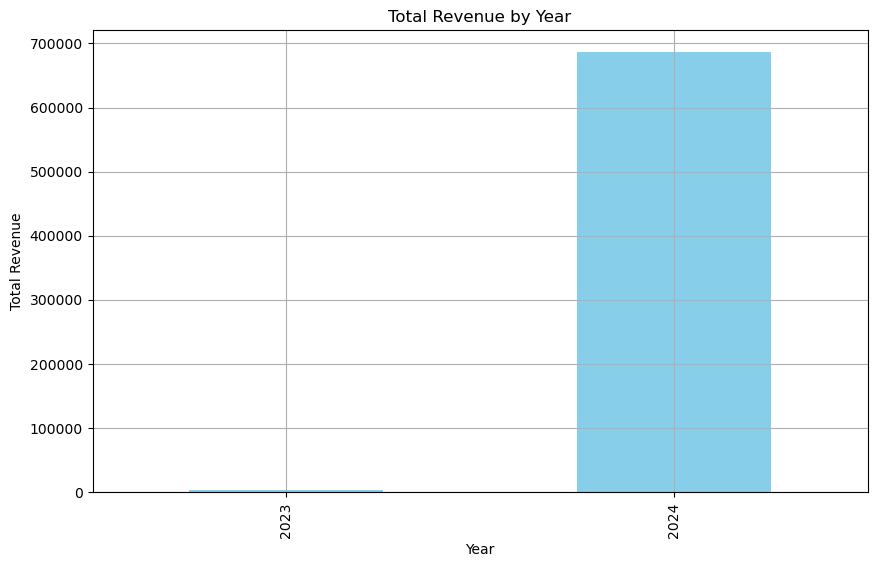

In [25]:
total_revenue_by_year = transactions.groupby('TransactionYear')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
total_revenue_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

# Analyzing total revenue by month

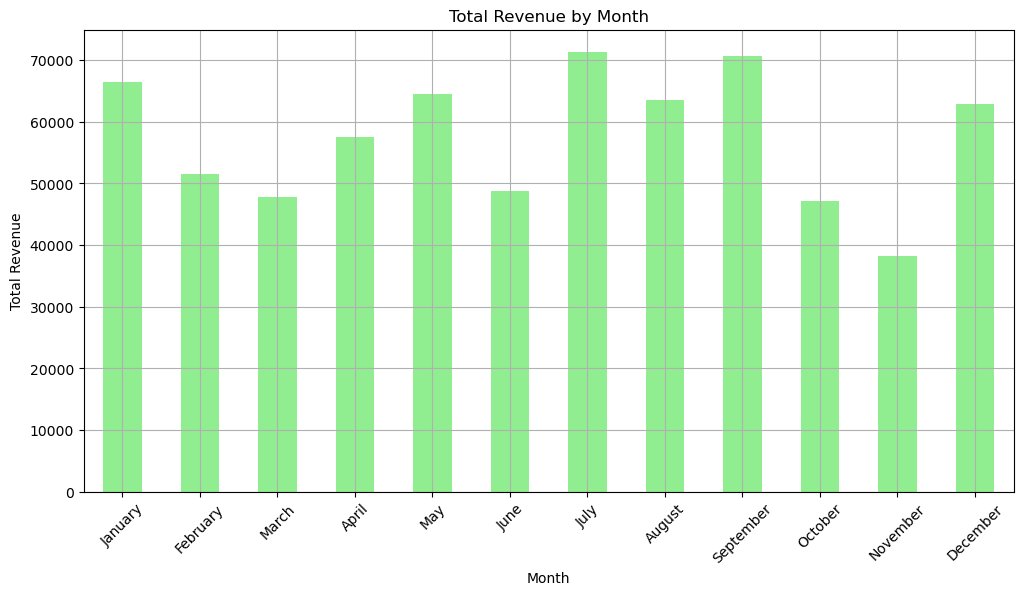

In [26]:
total_revenue_by_month = transactions.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
total_revenue_by_month = total_revenue_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                                           'July', 'August', 'September', 'October', 'November', 'December'])
total_revenue_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Analyzing the number of transactions by day of the week

C:\Users\askar\AppData\Local\Temp\ipykernel_1236\2131192535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, palette='pastel')


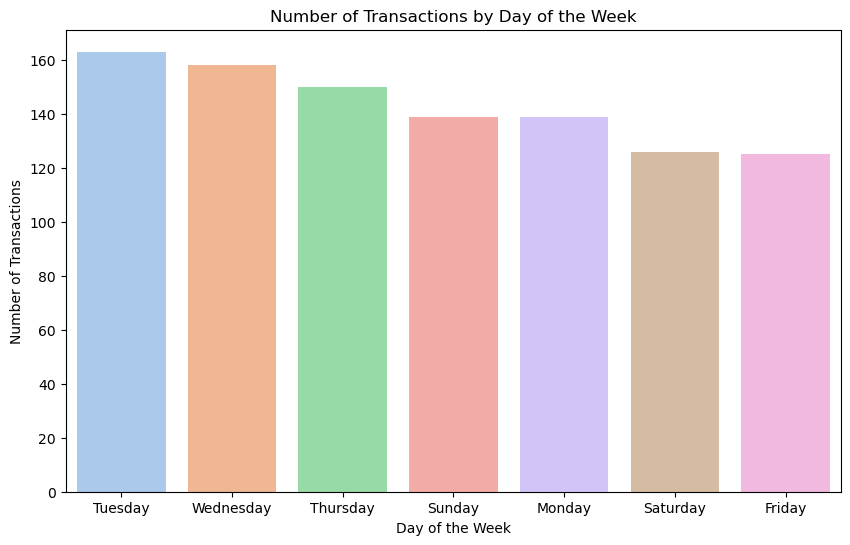

In [27]:
transactions['TransactionDay'] = transactions['TransactionDate'].dt.day_name()
transactions_by_day = transactions['TransactionDay'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, palette='pastel')
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

# Analyzing the average transaction value by day of the week

C:\Users\askar\AppData\Local\Temp\ipykernel_1236\2862914067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_value_by_day.index, y=avg_transaction_value_by_day.values, palette='magma')


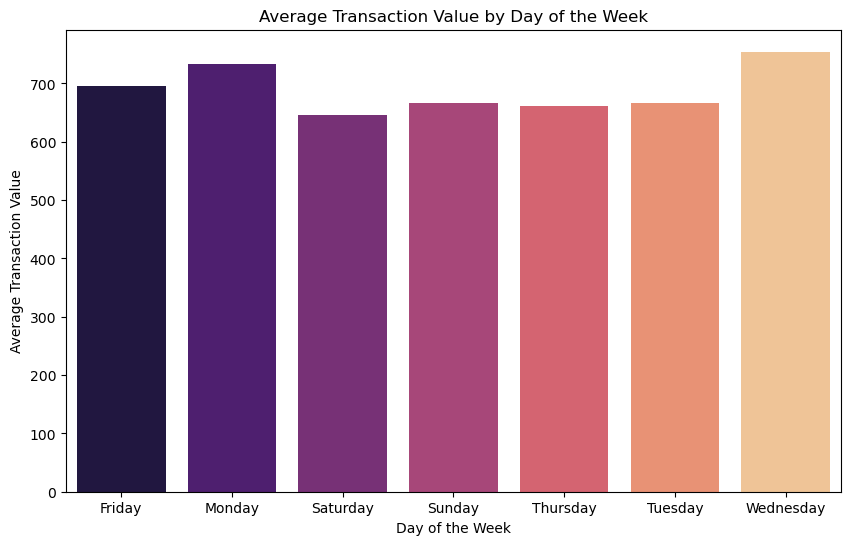

In [28]:
avg_transaction_value_by_day = transactions.groupby('TransactionDay')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_value_by_day.index, y=avg_transaction_value_by_day.values, palette='magma')
plt.title('Average Transaction Value by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Transaction Value')
plt.show()


# Analyzing the distribution of quantities sold

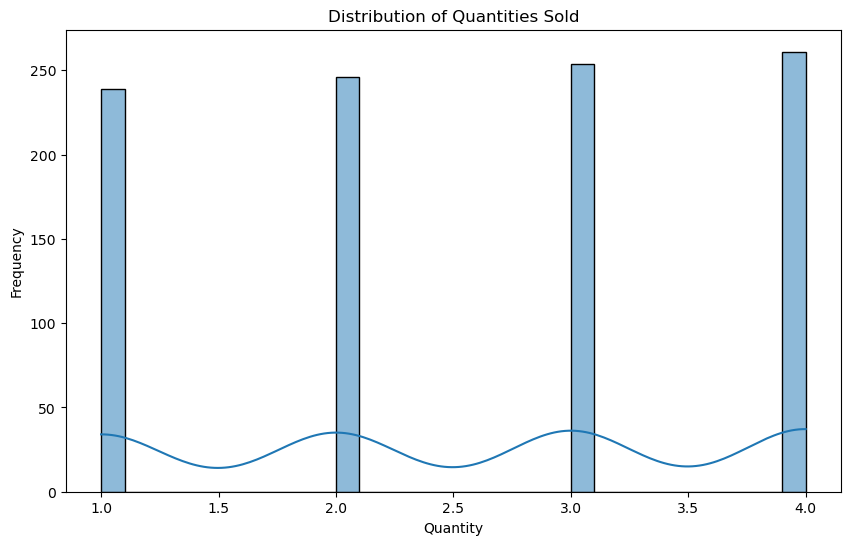

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantities Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Analyzing the total quantity sold by product

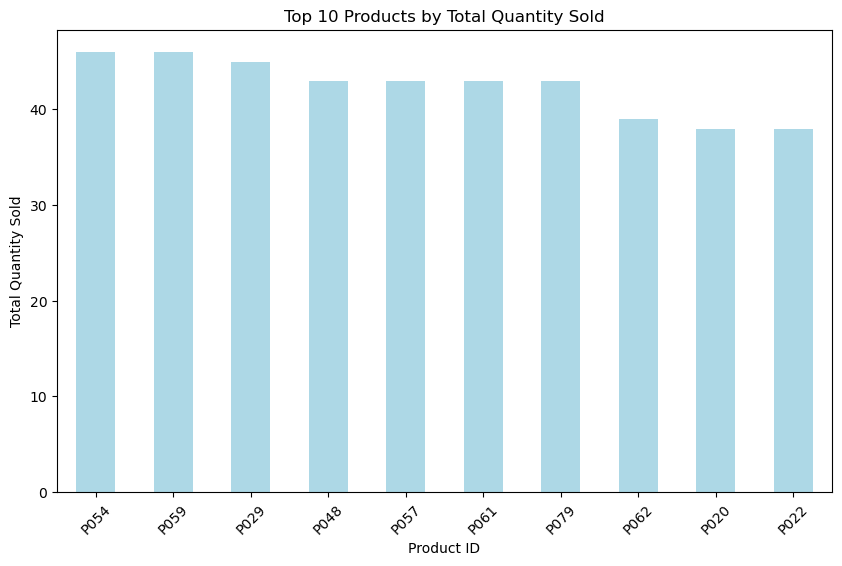

In [30]:
total_quantity_by_product = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
total_quantity_by_product.plot(kind='bar', color='lightblue')
plt.title('Top 10 Products by Total Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Analyzing the average quantity sold per transaction

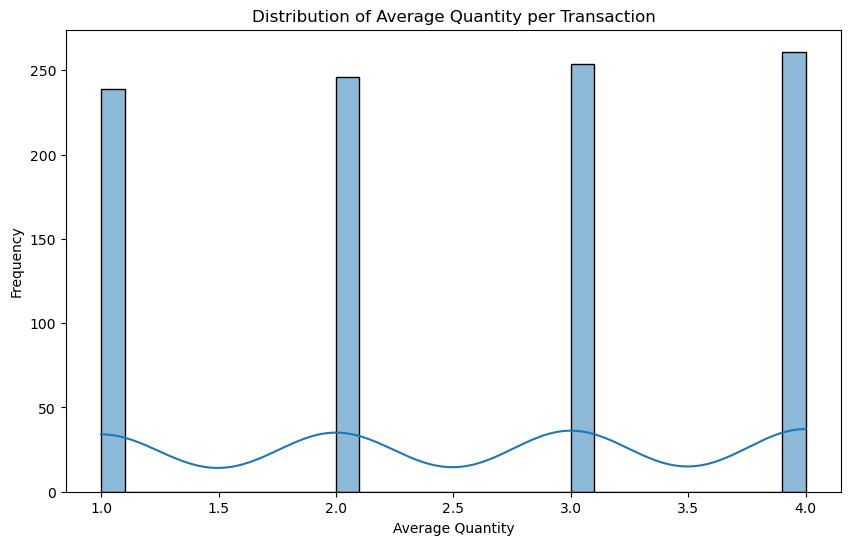

In [31]:
avg_quantity_per_transaction = transactions.groupby('TransactionID')['Quantity'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_quantity_per_transaction, bins=30, kde=True)
plt.title('Distribution of Average Quantity per Transaction')
plt.xlabel('Average Quantity')
plt.ylabel('Frequency')
plt.show()

# Analyzing the correlation between quantity and total value

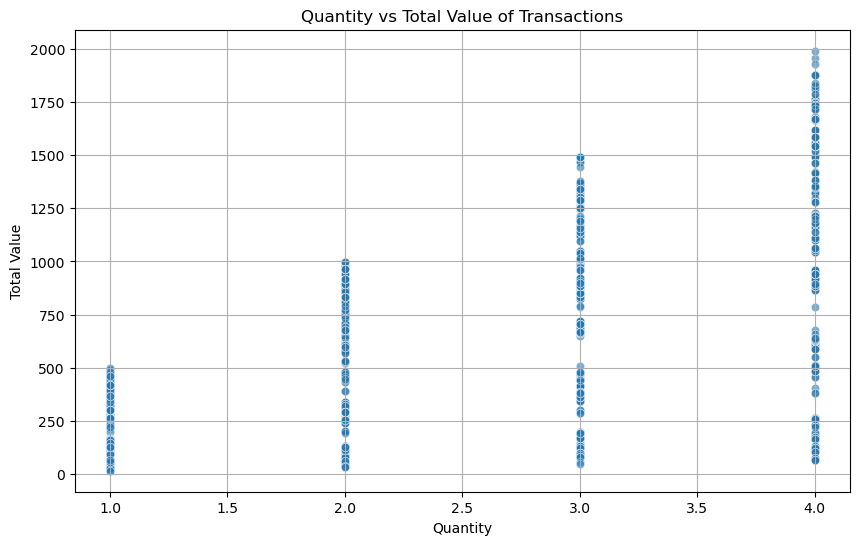

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue', alpha=0.6)
plt.title('Quantity vs Total Value of Transactions')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.grid()
plt.show()

# Analyzing the number of unique customers making transactions

Total Unique Customers: 199


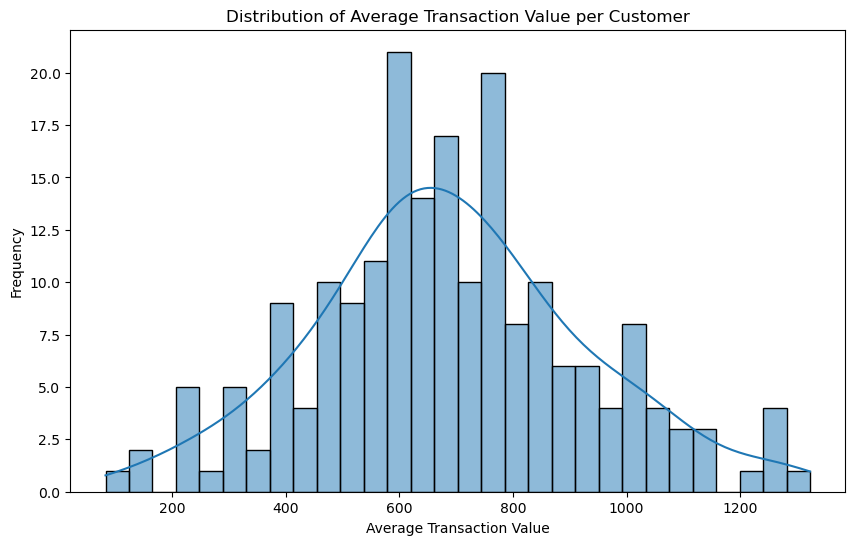

In [33]:
unique_customers = transactions['CustomerID'].nunique()
print(f'Total Unique Customers: {unique_customers}')

# Analyzing the average transaction value by customer
avg_transaction_value_per_customer = transactions.groupby('CustomerID')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_transaction_value_per_customer, bins=30, kde=True)
plt.title('Distribution of Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.show()